# Introduction machine learning

In [85]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

## Daten importieren

Die Daten können mit Pandas eingelesen werden mit dem Befehl `pd.read_csv()`.
In vielen Fällen funktioniert dies nicht direkt. Meistens liegt es dann an einem der folgenden Punkte:
- `FileNotFoundError` --> Entweder der Dateiname ist falsch geschrieben, oder der Pfad stimmt nicht.
- `UnicodeDecodeError` --> Entweder der Dateiname (+Pfad) wurden mit unerlaubten Zeichen geschrieben (bei Windows z.B. muss oft "//" statt "/" verwendet werden), oder die Datei selbst ist nicht im erwarteten "Encoding" gespeichert. Für letzterers gibt es zwei Möglichkeiten: (1) Die Datei mit einem Editor umwandeln. Oder (2) den parameter `encoding=...` entsprechend setzten.  
Es gibt sehr viele mögliche Encodings ([siehe Link](https://docs.python.org/3/library/codecs.html#standard-encodings)), aber am häufigsten sind "utf-8" (der Standard), "ANSI" (auf mac: "iso-8859-1" oder "ISO8859") oder "ASCII".
- `ParserError` --> Bedeutet meistens, dass der "delimiter" also das Trennzeichen falsch angegeben ist. Am besten die Datei kurz mit einem Editor öffnen und nachschauen und dann entsprechend setzten mit `delimiter="..."`. Typische Trennzeichen sind `","`, `";"`, `"\t"` (tab).
- Falls die Datei nicht mit den gewünschten Spaltennamen beginnt, kann dies durch das Angeben der zu überspringenden Zeilen korrigiert werden --> `skiprows=1` (1, 2, 3,... je nach Fall).

## Titanic dataset!

This data is taken from the [Kaggle Titanic challenge](https://www.kaggle.com/c/titanic/data).

Wir wollen hier versuchen aus den Daten der Passagiere vorherzusagen, ob diese die Titanic-Katastrophe überlebt haben oder nicht.

### Data Dictionary

| Variable   | Definition                        | Key                                        |
|------------|-----------------------------------|--------------------------------------------|
| survival   | Survival                          | 0 = No, 1 = Yes                            |
| pclass     | Ticket class                      | 1 = 1st, 2 = 2nd, 3 = 3rd                  |
| sex        | Sex                               |                                            |
| age        | Age in years                      |                                            |
| sibsp      | # of siblings/spouses aboard the Titanic |                                      |
| parch      | # of parents/children aboard the Titanic |                                      |
| ticket     | Ticket number                     |                                            |
| fare       | Passenger fare                    |                                            |
| cabin      | Cabin number                      |                                            |
| embarked   | Port of Embarkation               | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

- **pclass:** A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower

- **age:** Age is fractional if less than 1. If the age is estimated, it is in the form of `xx.5`.

- **sibsp:** The dataset defines family relations in this way:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch:** The dataset defines family relations in this way:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children traveled only with a nanny, therefore `parch=0` for them.


In [86]:
path_data = "..\..\datasets"
filename = os.path.join(path_data, "titanic_train.csv")

data = pd.read_csv(filename)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# (1) Erste Datenerkundung
Das sollte inzwischen fast automatisch gehen.

- Gibt es fehlende Werte? --> `.info()`
- erster Überblick & Suche nach problematischen Einträgen --> `.describe()` (oder `.describe(include="all")`)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
data.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

## Data cleaning
Hier müssen wir einige Entscheidungen treffen!

- Spalten in denen wir nur sehr wenige einträge haben --> entfernen
- Spalten entfernen, die wir bewusst nicht für unsere Vorhersagen benutzen wollen --> `Name`, `Ticket`
- Problemfall: `Age` --> Hier wollen wir, ausnahmsweise, die fehlenden Werte schätzen. Das nennt sich **data imputation** und sollte in den meisten Fällen vermieden werden, da es generierte Werte hinzufügt, also eigentlich sowas wie *fake data*. Hier aber: bitte die fehlenden Werte mit `fillna()` durch das mittlere Alter aller anderen eintragen. 

In [90]:
data_cleaned = data.drop(["Name", "Cabin", "Ticket", "PassengerId"], axis = 1)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [91]:
data_cleaned.Age = data_cleaned.Age.fillna(data.Age.median())
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [92]:
# embarked enthält noch 2 null Datenpunkte: weg damit
data_cleaned = data_cleaned.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


### Kategorische Daten umwandeln
Wir haben noch Spalten mit kategorischen Einträgen (als strings). Diese sollen in numerische Werte umgewandelt werden mit Hilfe von `pd.get_dummies`.

Tipp: Dopplungen gleicher Information sollte vermeiden werden. Es braucht also nicht "Sex_male" UND "Sex_female", da ja schon eine der beiden Informationen ausreichend ist.

In [93]:
data_cleaned = pd.get_dummies(data_cleaned, prefix="", prefix_sep="")
data_cleaned = data_cleaned.drop(["male"], axis=1)
data_cleaned.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,C,Q,S
0,0,3,22.0,1,0,7.2500,False,False,False,True
1,1,1,38.0,1,0,71.2833,True,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,True
4,0,3,35.0,0,0,8.0500,False,False,False,True


## Data exploration

In [94]:
# hier nur mäßig informativ, wer will darfs gerne probiern
#sb.pairplot(data_cleaned, hue="Survived", diag_kind="hist")

In [95]:
data_cleaned["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

## Correlation matrix

Nur anhand der Korrelationen:   
**Von welche Featuren können wir erwarten, dass sie für die Vorhersage des Überlebens (`Survived`) eine Rolle spielen werden?**

**Welches Feature scheint das wichtigste zu sein?**

Eintragen: ...

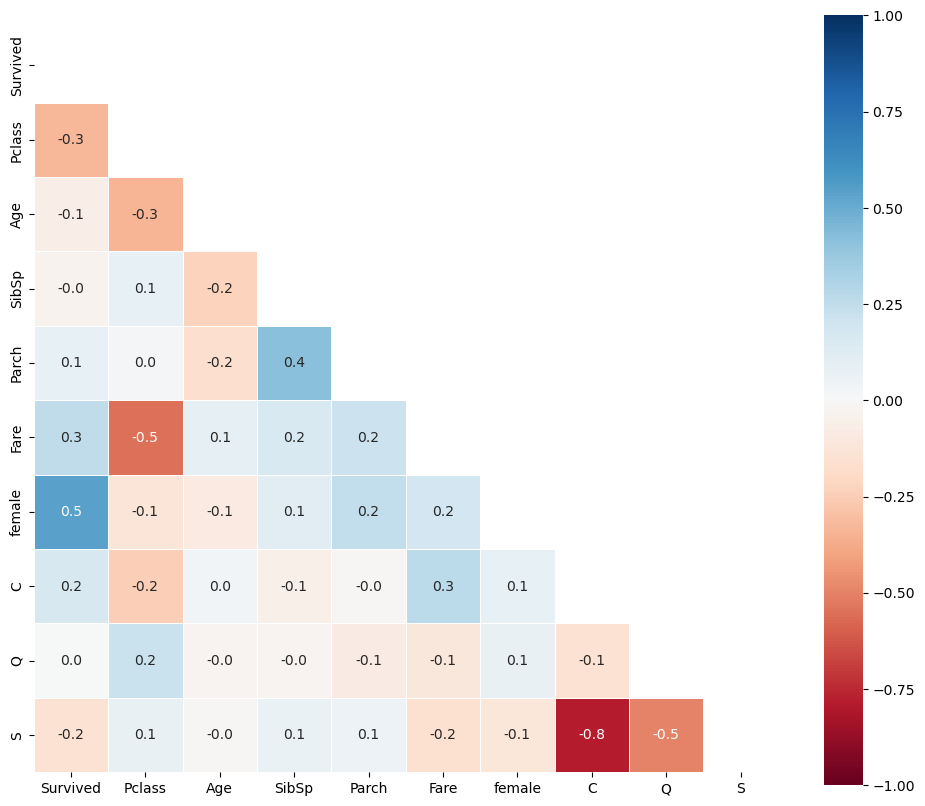

In [96]:
fig, ax = plt.subplots(figsize=(12, 10))

corr_matrix = data_cleaned.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sb.heatmap(corr_matrix,
           mask=mask,
           annot=True,
           vmin=-1, vmax=1,
           square=True,
           cmap="RdBu",
           linewidths=.5, fmt=".1f", ax=ax)

plt.show()

# Teilen in Daten und Label

- Label: "Survived" --> 0 nicht überlebt | 1 überlebt
- Daten: Alles ausser "Survived" --> `.drop()`

### Aufgaben:
- Aus `data` die Daten `X` und die Labels `y` erstellen.

In [97]:
# label
y = data_cleaned["Survived"]

# data
X = data_cleaned.drop(["Survived"], axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,female,C,Q,S
0,3,22.0,1,0,7.2500,False,False,False,True
1,1,38.0,1,0,71.2833,True,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,True
4,3,35.0,0,0,8.0500,False,False,False,True


## Train-Test split
Mit der scikit-learn Funktion `train_test_split` wird ein Datensatz zufällig auf Trainings- und Test-Daten verteilt. Wir können dabei angeben welcher Anteil zu Testdaten wird mit `test_size=...` wobei Werte zwischen 0 (keine Daten) und 1 (alle Daten) eingesetzt werden.
Siehe auch die [Scikit-Learn Dokumentation zu train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Da es eine zufällige Aufteilung ist, legen wir besser einen "Seed" fest um es reproduzierbar zu machen, und zwar mit `random_state=0` (oder einer anderen Zahl).



In [98]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((666, 9), (223, 9))

## Daten skalieren

Für einige Algorithmen ist es sehr wichtig, dass die Daten alle ähnlich skaliert sind. Zum Beispiel auch für k-nearest-neighbors. Dafür verwenden wir wieder den `StandardScaler` von Scikit-Learn. 

Am "saubersten" ist es hierbei, wenn die Skalierung **auf Basis der Trainings-daten** durchgeführt wird so dass keine indirekten Informationen von den Test-Daten mit einbezogen werden.

In [99]:
from sklearn.preprocessing import StandardScaler

# Scalierungen berechnen lassen --> über .fit()
scaler = StandardScaler().fit(X_train)

# Daten skalieren --> über .transform()
X_train = pd.DataFrame(scaler.transform(X_train), # complete code here,
                       columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), # complete code here,
                      columns=X.columns)

In [100]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,C,Q,S
0,0.815528,-0.575676,-0.474917,-0.480663,-0.500108,1.390655,-0.483046,-0.311768,0.620174
1,-0.386113,1.550175,-0.474917,-0.480663,-0.435393,1.390655,-0.483046,-0.311768,0.620174
2,-0.386113,-0.120137,-0.474917,-0.480663,-0.644473,-0.719086,-0.483046,-0.311768,0.620174
3,-1.587755,-0.120137,-0.474917,-0.480663,-0.115799,-0.719086,-0.483046,-0.311768,0.620174
4,0.815528,-1.107139,0.413551,-0.480663,-0.356656,1.390655,2.070197,-0.311768,-1.612452


# Modell trainieren
Zuerst werden wir ein k-nearest neighbor Modell ausprobieren, wieder mit scikit-learn. Siehe [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier).
Der wichtigste Parameter ist `n_neighbors`, d.h. die Anzahl der Nachbarn (das "k" in k-NN).

### Aufgabe:
- Ein k-nearest neighbor Modell mit den Trainingsdaten trainieren. Das heißt ein `KNeighborsClassifier` object erstellen (mit den nötigen Parametern) und dann mit `.fit()` trainieren.

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

## Vorhersagen machen
Während wir mit `.fit()` ein Modell trainieren, können wir mit `.predict()` Vorhersagen machen.

In [102]:
prediction_survival = knn.predict(X_test)

## Ergebnisse auswerten

Eine gute Möglichkeit um Klassifizierungs-Vorhersagen zu prüfen ist die "confusion matrix". Dafür nehmen wir die entsprechende Funktion aus scikit-learn (`confusion_matrix()` und übergeben ihr als Parameter die tatsächlichen Label sowie die vorhergesagten Label.

In [103]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test, y_pred=prediction_survival)

array([[118,  23],
       [ 24,  58]], dtype=int64)

In [104]:
knn.classes_

array([0, 1], dtype=int64)

<Axes: >

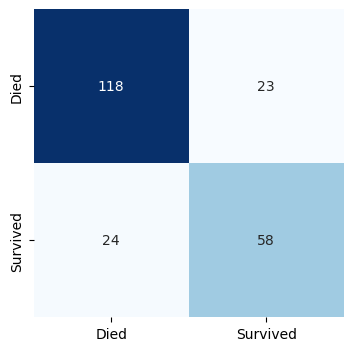

In [105]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(y_true=y_test, y_pred=prediction_survival),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

# Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier

In [106]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

# Entscheidungsbäume brauchen keine Skalierung!!

In [107]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,C,Q,S
351,1,28.0,0,0,35.0000,False,False,False,True
125,3,12.0,1,0,11.2417,False,True,False,False
578,3,28.0,1,0,14.4583,True,True,False,False
423,3,28.0,1,1,14.4000,True,False,False,True
119,3,2.0,4,2,31.2750,True,False,False,True


### Zuerste einen Decision Tree trainieren ohne Parameter anzupassen:

In [108]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
# Hiermit machen wir Vorhersagen auf den Trainingsdaten
prediction_survival = tree.predict(X_train)
prediction_survival

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,

<Axes: >

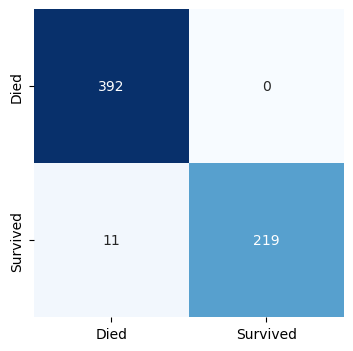

In [110]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(y_train, prediction_survival),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

<Axes: >

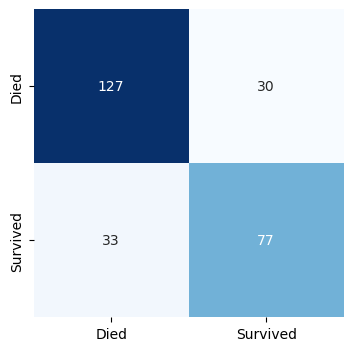

In [111]:
# Hiermit machen wir Vorhersagen auf den Trainingsdaten
prediction_survival = tree.predict(X_test)

fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(y_test, prediction_survival),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

### Evaluation:
Sieht so aus, als wäre das Modell ziemlich gut. Was müssten wir noch prüfen um das mit Sicherheit sagen zu können?

- Schaut euch mal das gleiche an, aber diesmal für das Test-Set.

<Axes: >

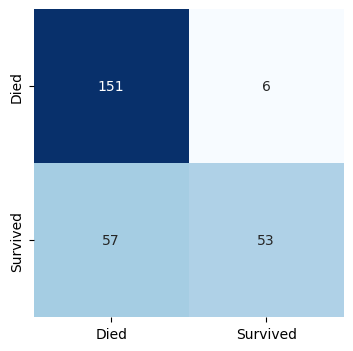

In [113]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
prediction_survival = tree.predict(X_test)
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(y_test, prediction_survival),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

# Modell trainieren
Hier jetzt ein Decision Tree Modell, wieder mit scikit-learn. Siehe [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier).
Der wichtigste Parameter ist `max_depth`, d.h. die maximale Tiefe des Baumes.

### Aufgabe:
- Ein decision tree Modell mit den Trainingsdaten trainieren und einer maximalen Tiefe von 2. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = # add own code

## Ergebnisse auswerten

### Aufgaben:
Ganz genau wie zuvor beim kNN-Modell ist die Aufgabe hier:
- Vorhersagen zu den Test-daten machen
- Vergleichen mit den tatsächlichen Werten über eine confusion matrix.

In [ ]:
prediction_survival = # add own code
prediction_survival

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(# add own code),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(# add own code)

## Interessant an Entscheidungsbäumen:
Eine gern genutze Eigenschaft von Eintscheidungsbäumen ist, dass wir uns die Bäume auch ausgeben lassen können!

In [ ]:
X_train.columns

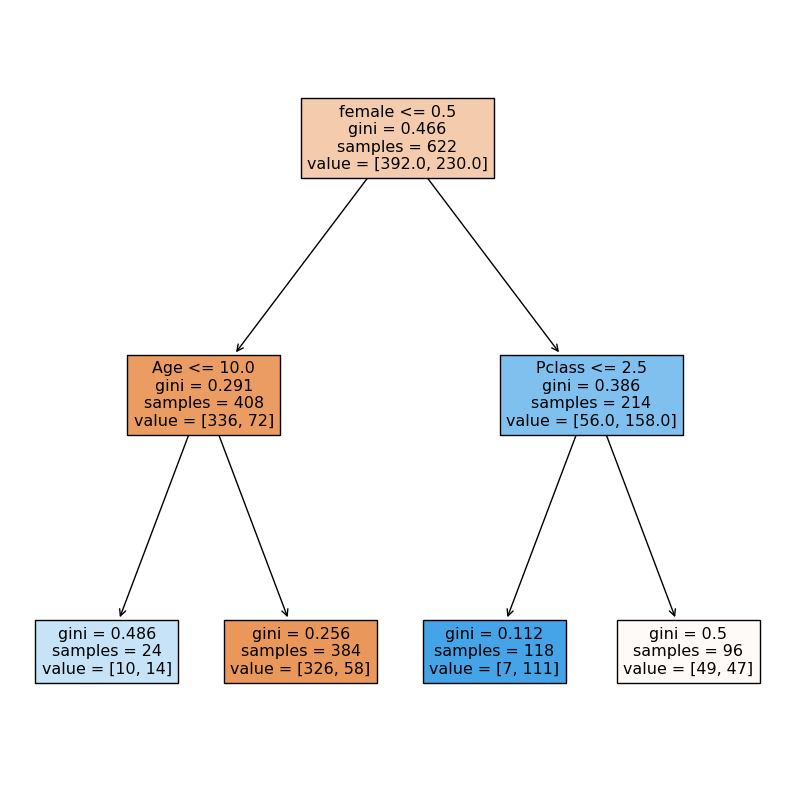

In [114]:
from sklearn.tree import plot_tree

feature_names = X_train.columns

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree, feature_names=feature_names, filled=True)
plt.show()

### Aufgabe:
- das gleiche Spiel nochmal laufen lassen, aber diesmal mit einer Baumtiefe von 4

In [ ]:
tree = DecisionTreeClassifier(# add own code)
# train model


In [ ]:
prediction_survival = # add own code

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

sb.heatmap(confusion_matrix(# add own code),
           annot=True, cmap="Blues", cbar=False, fmt=".0f",
           xticklabels=["Died", "Survived"],
           yticklabels=["Died", "Survived"])

In [ ]:
X_train.columns

In [ ]:
feature_names = X_train.columns

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree, feature_names=feature_names, filled=True)
plt.show()